# Yin Time Algorithm (Updated) with Initial Security Investigation

This notebook walks readers through the manual of using the function *YinsTimer* which currently is a installable package [here](https://github.com/yiqiao-yin/YinPortfolioManagement). 

The notebook starts with an overview of production code. Then we illustrate a few additional steps taken here at Yin's Capital. This software assumes that user has an desired stock at hand (one stock with available ticker).

- Overview of Buy/Sell Signal, YinsTimer
- Forecast Using RNN

## Price and Moving Average

We denote stock price at a time $t$ to be $p_t$. This is a time-series data set with an empirical expected return and volatility. The total length (downloadable from any website) would be $L$ and that is the total length of this data we are working with. First, we define Simple Moving Average to take the following form:
$$\text{SMA}_n = \frac{1}{n} \sum_{t=1}^{n} p_{t_0-t}$$
where $n$ refers to $n$ days of data used to compute the simple moving average and $t_0$ is a fixed value at any time in the data. The running index $t$ ranges from 1 to $n$ and we assume $n$ is strictly less than $L - t_0$ otherwise we would run out of data in computation.

## Distance between Price and Moving Average

Based on the definition above, for any stock, we can collect price as time-series data and compute simple moving average. The vector of price $p_t$ and the vector of simple moving average allow us to compute the distance between them. This distance takes the following form:
$$D_n = p_t - \text{SMA}_n$$
and we can plug in the formula of $SMA_n$ to obtain the following:
$$D_n = p_t - \text{SMA}_n = \frac{1}{n} \sum_{t=1}^{n} p_{t_0-t}$$
where the distance, $D_n$, is dependent on the price data and the simple moving average (which is a matter of choice).

## Asymptotic Behavior

In probability theory and statistics, the asymptotic behavior or the limiting behavior inteds to describe the general situation when we are allowed infinite data. In other words, we are really looking at some sort form of [Central Limit Theory](https://en.wikipedia.org/wiki/Central_limit_theorem). 

It can be shown that standardized $D_n$ tends to a standard normal distribution according to my work [here](https://journals.library.columbia.edu/index.php/cusj/article/view/6360). This is the key to allow me to obtain confidence interval and rejection region. The interpretation is the following.

## Interpretation

We observe the stock price to go up or down, and it is extremely difficult to come up with a strategy to determine whether the current traded price is low enough to act on. Without this decision, money manager cannot continue any business operation. However, we can instead observe the distance between price data and its many moving averages. In other words, we are observing some random variable that essentially converges to standard normal distribution. 

Hence, given any price traded in the market, we are able to say: this price is low, because we observe the behavior that this price falls below its many moving averages at a probability of $\pi$ which then we can use to construct rejection region. If this a price falls below a certain level that is unlikely (small value of $\pi$), then it is very likely it will not sustain its level due to normal behavior (in a bell-shape curve, an observation can fall on either side of the tails but it won't happen that often). This implies that the next few days the stock price is likely going to bounce back up. This gives us *buy signal*.

The same argument can be used to construct *sell signal*.

In [3]:
# !pip install git+https://github.com/yiqiao-yin/YinPortfolioManagement.git

In [4]:
from YinCapital_forecast.modules import Yin_Timer

------------------------------------------------------------------------------
MANUAL: 
Try run the following line by line in a Python Notebook.

        MANUAL: To install this python package, please use the following code.

        # In a python notebook:
        # !pip install git+https://github.com/yiqiao-yin/YinPortfolioManagement.git
        # In a command line:
        # pip install git+https://github.com/yiqiao-yin/YinPortfolioManagement.git
        
        # Run
        temp = YinsTimer(
            start_date       =   '2015-01-01',
            end_date         =   '2021-01-01',
            ticker           =   'FB',
            figsize          =   (15,6),
            LB               =   -1,
            UB               =   +1, 
            pick_SMA         =   1,
            sma_threshold_1  =   10,
            sma_threshold_2  =   30,
            sma_threshold_3  =   100,
            plotGraph        =   True,
            verbose          =   True,
            printManua

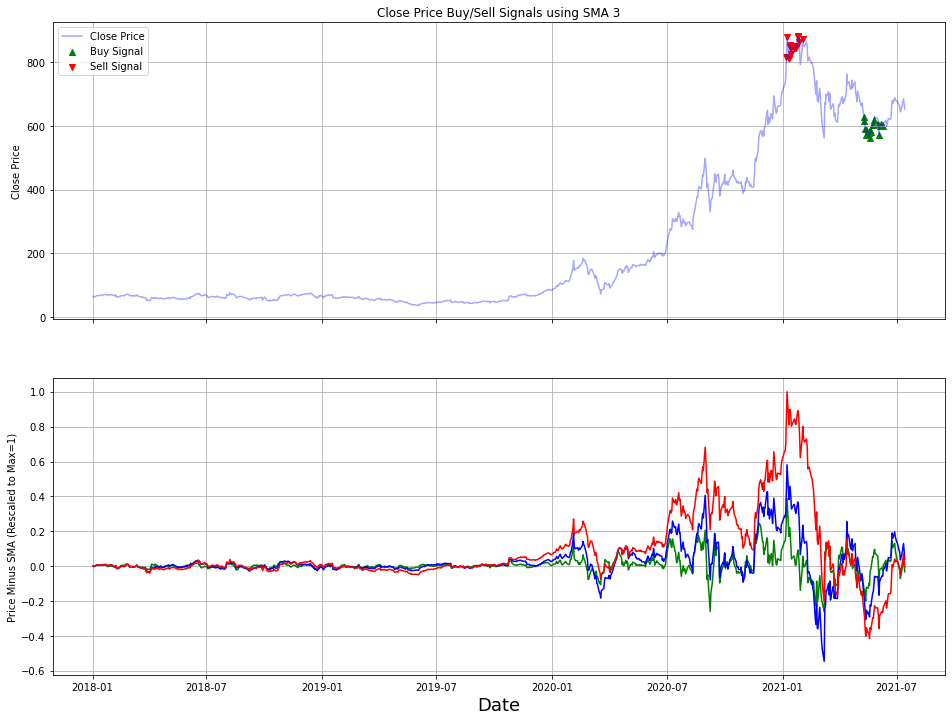

In [11]:
tmp1 = Yin_Timer(
    start_date       =   '2018-01-01',
    end_date         =   '2021-07-15',
    ticker           =   'TSLA',
    figsize          =   (16,12),
    LB               =   -.25,
    UB               =   +.8, 
    rescale          =   True,
    pick_SMA         =   3,
    sma_threshold_1  =   10,
    sma_threshold_2  =   30,
    sma_threshold_3  =   100,
    plotGraph        =   True,
    verbose          =   False,
    printManual      =   True,
    gotoSEC          =   False)

## Overview of Software Production Outflow

Using *keys* option in a dictionary, we are able to review the items saved for this package. Every thing listed below is ready to be extracted.

In [6]:
tmp1.keys()

dict_keys(['data', 'resulting matrix', 'basic statistics', 'estimatedReturn', 'estimatedRisk', 'ALL_DATA'])

Specifically, an entire list of related information is stored in the item "ALL_DATA".

In [7]:
tmp1['ALL_DATA'].keys()

dict_keys(['get stock info', 'get historical market data', 'show actions (dividends, splits)', 'show dividends', 'show splits', 'show financials', 'show balance sheet', 'show cashflow', 'show earnings', 'show sustainability', 'show analysts recommendations', 'show next event (earnings, etc)'])

In [8]:
tmp1['ALL_DATA']['get stock info'].keys()

dict_keys(['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'state', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 'industry', 'ebitdaMargins', 'profitMargins', 'grossMargins', 'operatingCashflow', 'revenueGrowth', 'operatingMargins', 'ebitda', 'targetLowPrice', 'recommendationKey', 'grossProfits', 'freeCashflow', 'targetMedianPrice', 'currentPrice', 'earningsGrowth', 'currentRatio', 'returnOnAssets', 'numberOfAnalystOpinions', 'targetMeanPrice', 'debtToEquity', 'returnOnEquity', 'targetHighPrice', 'totalCash', 'totalDebt', 'totalRevenue', 'totalCashPerShare', 'financialCurrency', 'revenuePerShare', 'quickRatio', 'recommendationMean', 'exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'quoteType', 'symbol', 'messageBoardId', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskRating', 'f

In [9]:
tmp1['ALL_DATA']['get stock info']['longBusinessSummary']

'Amazon.com, Inc. engages in the retail sale of consumer products and subscriptions in North America and internationally. The company operates through three segments: North America, International, and Amazon Web Services (AWS). It sells merchandise and content purchased for resale from third-party sellers through physical and online stores. The company also manufactures and sells electronic devices, including Kindle, Fire tablets, Fire TVs, Rings, and Echo and other devices; provides Kindle Direct Publishing, an online service that allows independent authors and publishers to make their books available in the Kindle Store; and develops and produces media content. In addition, it offers programs that enable sellers to sell their products on its websites, as well as its stores; and programs that allow authors, musicians, filmmakers, skill and app developers, and others to publish and sell content. Further, the company provides compute, storage, database, analytics, machine learning, and 

In [10]:
tmp1['ALL_DATA']['show balance sheet']

[                             2020-12-31    2019-12-31    2018-12-31  \
 Intangible Assets          4.981000e+09  4.049000e+09  4.110000e+09   
 Capital Surplus            4.286500e+10  3.365800e+10  2.679100e+10   
 Total Liab                 2.277910e+11  1.631880e+11  1.190990e+11   
 Total Stockholder Equity   9.340400e+10  6.206000e+10  4.354900e+10   
 Other Current Liab         1.526700e+10  1.220200e+10  9.959000e+09   
 Total Assets               3.211950e+11  2.252480e+11  1.626480e+11   
 Common Stock               5.000000e+06  5.000000e+06  5.000000e+06   
 Other Current Assets       2.330000e+08  2.760000e+08  4.180000e+08   
 Retained Earnings          5.255100e+10  3.122000e+10  1.962500e+10   
 Other Liab                 1.701700e+10  1.217100e+10  1.756300e+10   
 Good Will                  1.501700e+10  1.475400e+10  1.454800e+10   
 Treasury Stock            -2.017000e+09 -2.823000e+09 -2.872000e+09   
 Other Assets               1.209700e+10  1.009600e+10  6.370000

## Stock Price Forecast Using RNN

In [11]:
from YinCapital_forecast.modules import RNN_Regressor

In our daily lives we interact with chatbot customer services, e-mail spam detections, voice recognition, language translation, or stock market predictions. These artificial intelligence products are powered by Recursive Neural Network (RNN), Long Short-Term Model (LSTM) and Gated recurrent unit (GRU), of an important branch of deep learning that deliver superior predictions for sequential data such as time series, language patterns, voice patterns. It is not so easy to learn RNN, LSTM, GRU like we learn a regression. Here we use RNN to forecast stock price.

Some sample background readings can be found here: [A Technical Guide on RNN/LSTM/GRU for Stock Price Prediction](https://medium.com/swlh/a-technical-guide-on-rnn-lstm-gru-for-stock-price-prediction-bce2f7f30346), [Stock prediction using recurrent neural networks](https://towardsdatascience.com/stock-prediction-using-recurrent-neural-networks-c03637437578).

------------------------------------------------------------------------------

            MANUAL: To install this python package, please use the following code.

            # In a python notebook:
            # !pip install git+https://github.com/yiqiao-yin/YinPortfolioManagement.git
            # In a command line:
            # pip install git+https://github.com/yiqiao-yin/YinPortfolioManagement.git

            # Run
            tmp = RNN_Regressor(
                    start_date =   '2013-01-01',
                    end_date   =   '2019-12-6',
                    tickers    =   'AAPL',
                    cutoff     =   0.8,
                    numOfHiddenLayer = 3,
                    l1_units   =   50,
                    l2_units   =   50,
                    l3_units   =   50,
                    l4_units   =   30,
                    l5_units   =   10,
                    dropOutRate =  0.2,
                    optimizer  =   'adam',
                    loss       =   'mean

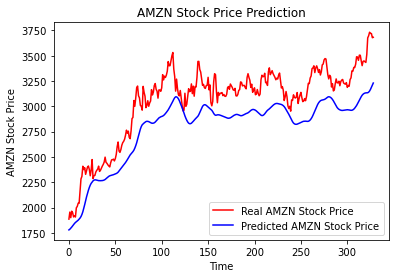

---------------------------------------------------------------------------------
Root Mean Square Error is 286.63 for test set.
------------------
Interpretation:
------------------
On the test set, the performance of this LSTM architecture guesses 
AMZN stock price on average within the error of $286.63 dollars.
---------------------------------------------------------------------------------


In [12]:
tmp2 = RNN_Regressor(
    start_date =   '2013-01-01',
    end_date   =   '2021-07-15',
    tickers    =   'AMZN',
    cutoff     =   0.8,
    numOfHiddenLayer = 3,
    l1_units   =   50,
    l2_units   =   50,
    l3_units   =   50,
    l4_units   =   30,
    l5_units   =   10,
    dropOutRate =  0.2,
    optimizer  =   'adam',
    loss       =   'mean_squared_error',
    epochs     =   50,
    batch_size =   64,
    plotGraph  =   True,
    verbose    =   True )

Ends here.